In [ ]:
#Importing Libraries

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

#New libraries for our project

import yfinance as yf
import datetime

In [ ]:
#Importing Data from Yahoo Finance

#Importing Data from the 5 stocks in the Parent Paper Code and 2 additional stocks

TSLA = yf.Ticker("TSLA")

AAPL = yf.Ticker("AAPL")

GOOG = yf.Ticker("GOOG")

MSFT = yf.Ticker("MSFT")

AMZN = yf.Ticker("AMZN")

SBUX = yf.Ticker("SBUX")

NFLX = yf.Ticker("NFLX")

In [ ]:
#Creating Start and End times for the data

startDate = datetime.datetime(2018, 1, 3)

endDate = datetime.datetime(2023, 1, 4)

In [ ]:
#Modifying the Stock data to be the 5 years

AAPL = AAPL.history(start = startDate, end = endDate)

TSLA = TSLA.history(start = startDate, end = endDate)

AMZN = AMZN.history(start = startDate, end = endDate)

GOOG = GOOG.history(start = startDate, end = endDate)

MSFT = MSFT.history(start = startDate, end = endDate)

SBUX = SBUX.history(start = startDate, end = endDate)

NFLX = NFLX.history(start = startDate, end = endDate)


AAPL.to_csv("AAPL_Stock_Data")

TSLA.to_csv("TSLA_Stock_Data")

AMZN.to_csv("AMZN_Stock_Data")

GOOG.to_csv("GOOG_Stock_Data")

MSFT.to_csv("MSFT_Stock_Data")

SBUX.to_csv("SBUX_Stock_Data")

NFLX.to_csv("NFLX_Stock_Data")


AAPL_Data = pd.read_csv("AAPL_Stock_Data")

TSLA_Data = pd.read_csv("TSLA_Stock_Data")

AMZN_Data = pd.read_csv("AMZN_Stock_Data")

GOOG_Data = pd.read_csv("GOOG_Stock_Data")

MSFT_Data = pd.read_csv("MSFT_Stock_Data")

SBUX_Data = pd.read_csv("SBUX_Stock_Data")

NFLX_Data = pd.read_csv("NFLX_Stock_Data")

In [ ]:
#Unseen Data

TSLA = yf.Ticker("TSLA")

AAPL = yf.Ticker("AAPL")

GOOG = yf.Ticker("GOOG")

MSFT = yf.Ticker("MSFT")

AMZN = yf.Ticker("AMZN")

SBUX = yf.Ticker("SBUX")

NFLX = yf.Ticker("NFLX")

unseenStart = datetime.datetime(2023, 1, 5)

unseenEnd = datetime.datetime(2024, 4, 5)

AAPL_Valid = AAPL.history(start = unseenStart, end = unseenEnd)

TSLA_Valid = TSLA.history(start = unseenStart, end = unseenEnd)

GOOG_Valid = GOOG.history(start = unseenStart, end = unseenEnd)

AMZN_Valid = AMZN.history(start = unseenStart, end = unseenEnd)

MSFT_Valid = MSFT.history(start = unseenStart, end = unseenEnd)

SBUX_Valid = SBUX.history(start = unseenStart, end = unseenEnd)

NFLX_Valid = NFLX.history(start = unseenStart, end = unseenEnd)


AAPL_Valid.to_csv("AAPL_Valid")

TSLA_Valid.to_csv("TSLA_Valid")

AMZN_Valid.to_csv("AMZN_Valid")

GOOG_Valid.to_csv("GOOG_Valid")

MSFT_Valid.to_csv("MSFT_Valid")

SBUX_Valid.to_csv("SBUX_Valid")

NFLX_Valid.to_csv("NFLX_Valid")


AAPL_Unseen = pd.read_csv("AAPL_Valid")

TSLA_Unseen = pd.read_csv("TSLA_Valid")

AMZN_Unseen = pd.read_csv("AMZN_Valid")

GOOG_Unseen = pd.read_csv("GOOG_Valid")

MSFT_Unseen = pd.read_csv("MSFT_Valid")

SBUX_Unseen = pd.read_csv("SBUX_Valid")

NFLX_Unseen = pd.read_csv("NFLX_Valid")

In [ ]:
#Data Preprocessing from the Parent Paper

def Dataset(Data, Date):

  Train_Data = Data['Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)

  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)

  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

In [ ]:
#Using the Custom Learning Rate from the Parent Paper

def scheduler(epoch):

  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150)
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)

  return lrate

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
#Base Model from Parent Paper

def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [ ]:
#New Model

#This is where we altered the model to create 4 different models


def New_Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(25, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

APPLE

In [ ]:
#Creating the Train and Test Dataset

#End Date for Train Data: 7/1/2023

#Beginning Date for Test Data: 7/2/2024

AAPL_Date = '2022-1-1'
AAPL_Train_X, AAPL_Train_Y, AAPL_Test_X, AAPL_Test_Y = Dataset(AAPL_Data, AAPL_Date)

In [ ]:
#Creating Unseen Data

AAPL_Unseen_Date = '2023-4-1'

AAPL_Unseen_Train_X, AAPL_Unseen_Train_Y, AAPL_Unseen_Test_X, AAPL_Unseen_Test_Y = Dataset(AAPL_Unseen, AAPL_Unseen_Date)

In [ ]:
# AAPL_Model

AAPL_Model = New_Model()

AAPL_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

AAPL_hist = AAPL_Model.fit(AAPL_Train_X, AAPL_Train_Y, epochs = 200, validation_data = (AAPL_Test_X, AAPL_Test_Y), callbacks=[callback])

Epoch 1/200
8/8 [==============================] - 6s 131ms/step - loss: 10967.6367 - root_mean_squared_error: 104.7265 - val_loss: 20332.1113 - val_root_mean_squared_error: 142.5907 - lr: 0.0000e+00
Epoch 2/200
8/8 [==============================] - 0s 51ms/step - loss: 10967.6162 - root_mean_squared_error: 104.7264 - val_loss: 20331.9961 - val_root_mean_squared_error: 142.5903 - lr: 6.6667e-08
Epoch 3/200
8/8 [==============================] - 0s 49ms/step - loss: 10967.5410 - root_mean_squared_error: 104.7260 - val_loss: 20331.7676 - val_root_mean_squared_error: 142.5895 - lr: 1.3333e-07
Epoch 4/200
8/8 [==============================] - 0s 51ms/step - loss: 10967.4092 - root_mean_squared_error: 104.7254 - val_loss: 20331.4277 - val_root_mean_squared_error: 142.5883 - lr: 2.0000e-07
Epoch 5/200
8/8 [==============================] - 0s 49ms/step - loss: 10967.2246 - root_mean_squared_error: 104.7245 - val_loss: 20330.9668 - val_root_mean_squared_error: 142.5867 - lr: 2.6667e-07
Epoc

In [ ]:
history_dict = AAPL_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

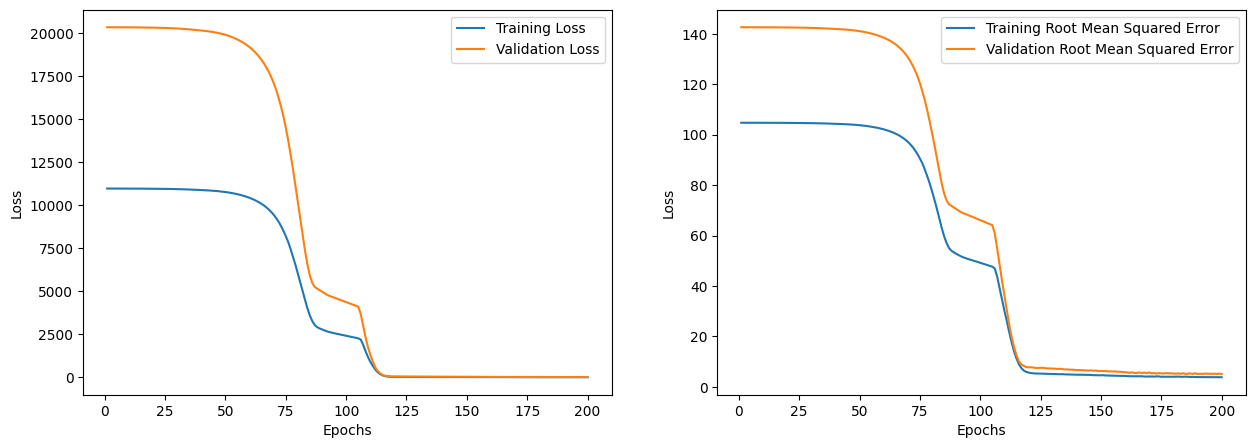

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [ ]:
AAPL_prediction = AAPL_Model.predict(AAPL_Unseen_Test_X)

1/1 [==============================] - 0s 459ms/step


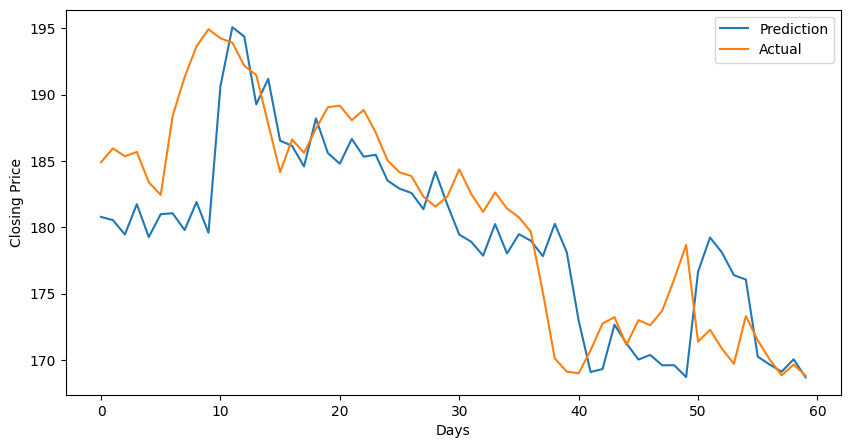

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(AAPL_prediction.reshape(-1), label = 'Prediction')
plt.plot(AAPL_Unseen_Test_Y.reshape(-1), label = 'Actual')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(AAPL_Unseen_Test_Y.reshape(-1, 5), AAPL_prediction))
mape = np.mean(np.abs(AAPL_prediction - AAPL_Unseen_Test_Y.reshape(-1, 5))/np.abs(AAPL_Unseen_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 4.873501090181195
MAPE: 0.02012592462968526


TESLA

In [ ]:
#Creating Train and Test Data

TSLA_Date = '2022-1-1'
TSLA_Train_X, TSLA_Train_Y, TSLA_Test_X, TSLA_Test_Y = Dataset(TSLA_Data, TSLA_Date)

In [ ]:
#Creating Unseen Data

TSLA_Unseen_Date = '2023-4-1'

TSLA_Unseen_Train_X, TSLA_Unseen_Train_Y, TSLA_Unseen_Test_X, TSLA_Unseen_Test_Y = Dataset(TSLA_Unseen, TSLA_Unseen_Date)

In [ ]:
# TSLA_Model

TSLA_Model = New_Model()

TSLA_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

TSLA_hist = TSLA_Model.fit(TSLA_Train_X, TSLA_Train_Y, epochs = 200, validation_data = (TSLA_Test_X, TSLA_Test_Y), callbacks=[callback])

Epoch 1/200
8/8 [==============================] - 6s 135ms/step - loss: 31066.9648 - root_mean_squared_error: 176.2582 - val_loss: 36438.7266 - val_root_mean_squared_error: 190.8893 - lr: 0.0000e+00
Epoch 2/200
8/8 [==============================] - 0s 57ms/step - loss: 31066.8457 - root_mean_squared_error: 176.2579 - val_loss: 36438.5156 - val_root_mean_squared_error: 190.8887 - lr: 6.6667e-08
Epoch 3/200
8/8 [==============================] - 0s 54ms/step - loss: 31066.4629 - root_mean_squared_error: 176.2568 - val_loss: 36438.0938 - val_root_mean_squared_error: 190.8876 - lr: 1.3333e-07
Epoch 4/200
8/8 [==============================] - 0s 57ms/step - loss: 31065.8027 - root_mean_squared_error: 176.2549 - val_loss: 36437.4492 - val_root_mean_squared_error: 190.8860 - lr: 2.0000e-07
Epoch 5/200
8/8 [==============================] - 0s 55ms/step - loss: 31064.8652 - root_mean_squared_error: 176.2523 - val_loss: 36436.5234 - val_root_mean_squared_error: 190.8835 - lr: 2.6667e-07
Epoc

In [ ]:
history_dict = TSLA_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

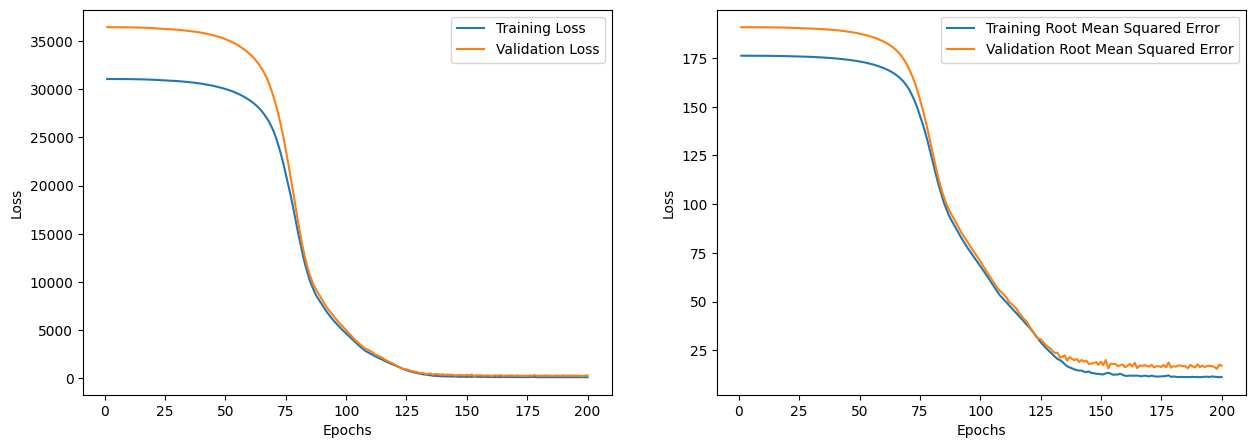

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [ ]:
TSLA_prediction = TSLA_Model.predict(TSLA_Unseen_Test_X)

1/1 [==============================] - 1s 536ms/step


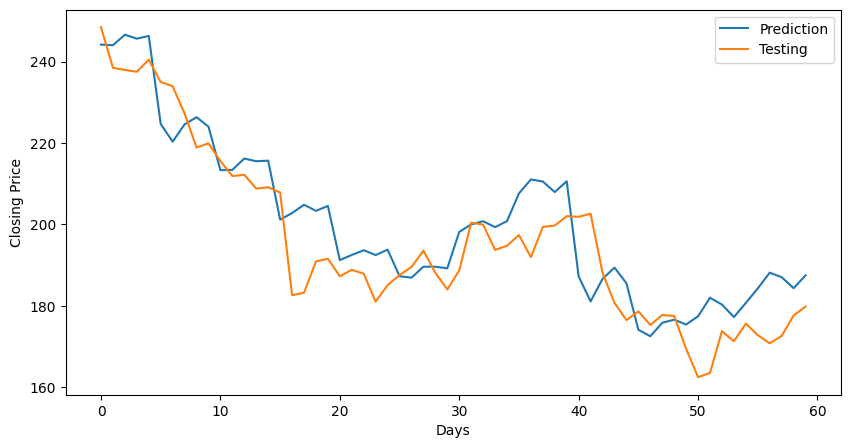

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(TSLA_prediction.reshape(-1), label = 'Prediction')
plt.plot(TSLA_Unseen_Test_X.reshape(-1), label = 'Testing')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(TSLA_Unseen_Test_Y.reshape(-1, 5), TSLA_prediction))
mape = np.mean(np.abs(TSLA_prediction - TSLA_Unseen_Test_Y.reshape(-1, 5))/np.abs(TSLA_Unseen_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 14.649498200728038
MAPE: 0.06209431327748354


Google

In [ ]:
#Creating Train and Test Data

GOOG_Date = '2022-1-1'
GOOG_Train_X, GOOG_Train_Y, GOOG_Test_X, GOOG_Test_Y = Dataset(GOOG_Data, GOOG_Date)

In [ ]:
#Creating Unseen Data

GOOG_Unseen_Date = '2023-4-1'

GOOG_Unseen_Train_X, GOOG_Unseen_Train_Y, GOOG_Unseen_Test_X, GOOG_Unseen_Test_Y = Dataset(GOOG_Unseen, GOOG_Unseen_Date)

In [ ]:
# GOOG_Model

GOOG_Model = New_Model()

GOOG_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

GOOG_hist = GOOG_Model.fit(GOOG_Train_X, GOOG_Train_Y, epochs = 200, validation_data = (GOOG_Test_X, GOOG_Test_Y), callbacks=[callback])

Epoch 1/200
8/8 [==============================] - 6s 134ms/step - loss: 8345.2061 - root_mean_squared_error: 91.3521 - val_loss: 9101.1543 - val_root_mean_squared_error: 95.4000 - lr: 0.0000e+00
Epoch 2/200
8/8 [==============================] - 0s 53ms/step - loss: 8345.1963 - root_mean_squared_error: 91.3520 - val_loss: 9101.1240 - val_root_mean_squared_error: 95.3998 - lr: 6.6667e-08
Epoch 3/200
8/8 [==============================] - 0s 49ms/step - loss: 8345.1592 - root_mean_squared_error: 91.3518 - val_loss: 9101.0645 - val_root_mean_squared_error: 95.3995 - lr: 1.3333e-07
Epoch 4/200
8/8 [==============================] - 0s 51ms/step - loss: 8345.1025 - root_mean_squared_error: 91.3515 - val_loss: 9100.9756 - val_root_mean_squared_error: 95.3990 - lr: 2.0000e-07
Epoch 5/200
8/8 [==============================] - 0s 50ms/step - loss: 8345.0205 - root_mean_squared_error: 91.3511 - val_loss: 9100.8525 - val_root_mean_squared_error: 95.3984 - lr: 2.6667e-07
Epoch 6/200
8/8 [=======

In [ ]:
history_dict = GOOG_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

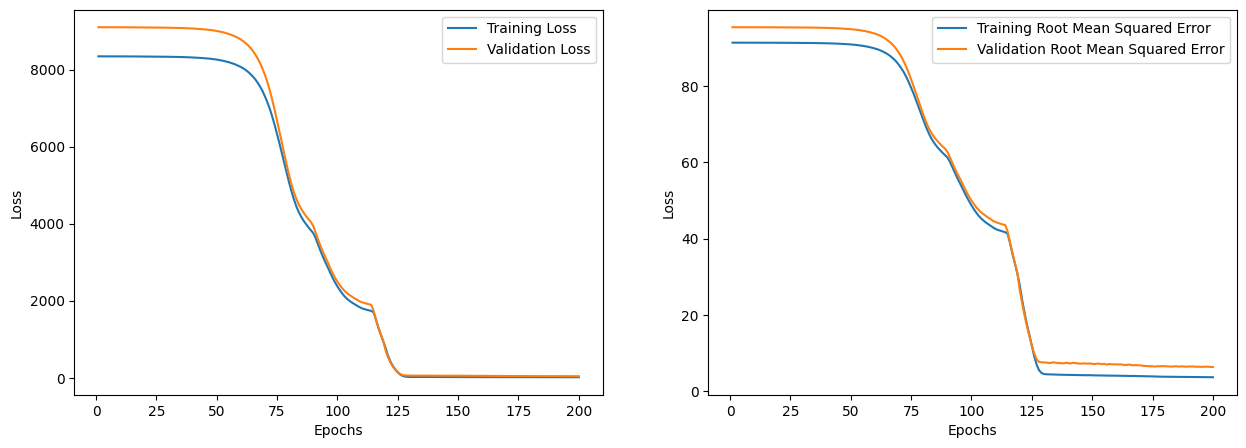

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [ ]:
GOOG_prediction = GOOG_Model.predict(GOOG_Unseen_Test_X)

1/1 [==============================] - 0s 450ms/step


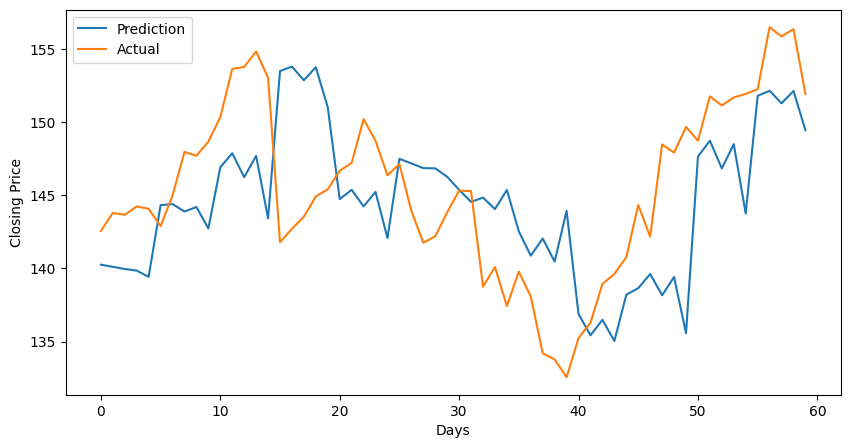

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(GOOG_prediction.reshape(-1), label = 'Prediction')
plt.plot(GOOG_Unseen_Test_Y.reshape(-1), label = 'Actual')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(GOOG_Unseen_Test_Y.reshape(-1, 5), GOOG_prediction))
mape = np.mean(np.abs(GOOG_prediction - GOOG_Unseen_Test_Y.reshape(-1, 5))/np.abs(GOOG_Unseen_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 5.732735772300627
MAPE: 0.03296012782300633


AMAZON

In [ ]:
#Creating Train and Test Data

AMZN_Date = '2022-1-1'
AMZN_Train_X, AMZN_Train_Y, AMZN_Test_X, AMZN_Test_Y = Dataset(AMZN_Data, AMZN_Date)

In [ ]:
#Creating Unseen Data

AMZN_Unseen_Date = '2023-4-1'

AMZN_Unseen_Train_X, AMZN_Unseen_Train_Y, AMZN_Unseen_Test_X, AMZN_Unseen_Test_Y = Dataset(AMZN_Unseen, AMZN_Unseen_Date)

In [ ]:
# AMZN_Model

AMZN_Model = New_Model()

AMZN_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

AMZN_hist = AMZN_Model.fit(AMZN_Train_X, AMZN_Train_Y, epochs = 200, validation_data = (AMZN_Test_X, AMZN_Test_Y), callbacks=[callback])

Epoch 1/200
8/8 [==============================] - 6s 129ms/step - loss: 15954.3652 - root_mean_squared_error: 126.3106 - val_loss: 9675.7432 - val_root_mean_squared_error: 98.3654 - lr: 0.0000e+00
Epoch 2/200
8/8 [==============================] - 0s 49ms/step - loss: 15954.3271 - root_mean_squared_error: 126.3104 - val_loss: 9675.7041 - val_root_mean_squared_error: 98.3652 - lr: 6.6667e-08
Epoch 3/200
8/8 [==============================] - 0s 53ms/step - loss: 15954.1895 - root_mean_squared_error: 126.3099 - val_loss: 9675.6279 - val_root_mean_squared_error: 98.3648 - lr: 1.3333e-07
Epoch 4/200
8/8 [==============================] - 0s 46ms/step - loss: 15953.9463 - root_mean_squared_error: 126.3089 - val_loss: 9675.5127 - val_root_mean_squared_error: 98.3642 - lr: 2.0000e-07
Epoch 5/200
8/8 [==============================] - 0s 48ms/step - loss: 15953.6201 - root_mean_squared_error: 126.3076 - val_loss: 9675.3623 - val_root_mean_squared_error: 98.3634 - lr: 2.6667e-07
Epoch 6/200
8/

In [ ]:
history_dict = AMZN_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

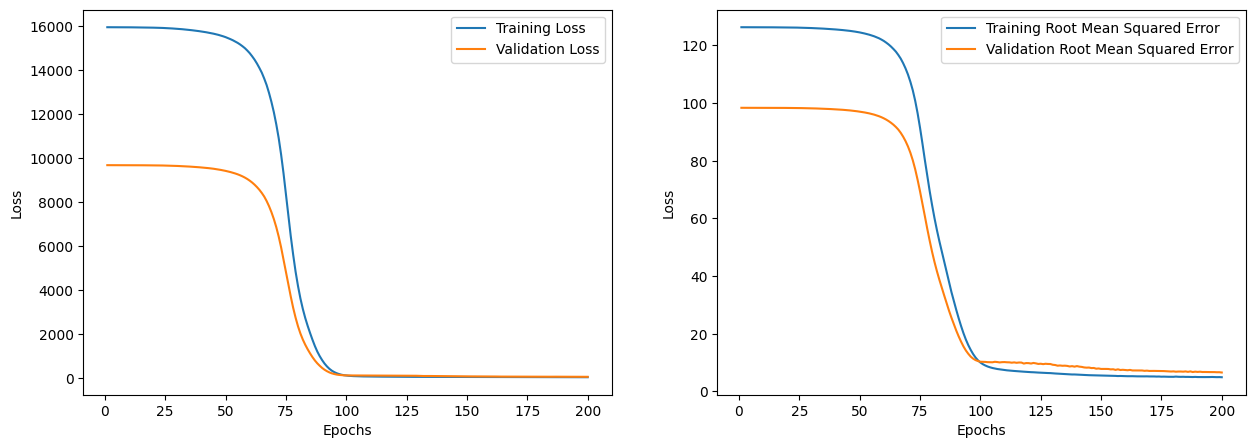

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [ ]:
AMZN_prediction = AMZN_Model.predict(AMZN_Unseen_Test_X)

1/1 [==============================] - 0s 487ms/step


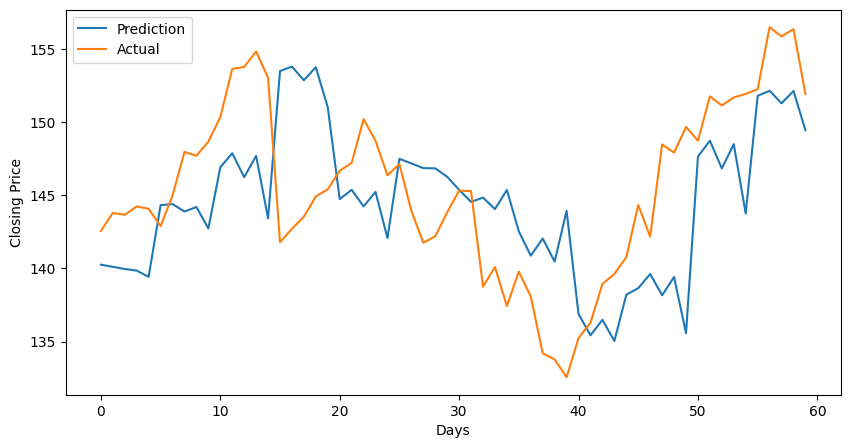

In [ ]:
#Plot the Results
plt.figure(figsize = (10, 5))
plt.plot(GOOG_prediction.reshape(-1), label = 'Prediction')
plt.plot(GOOG_Unseen_Test_Y.reshape(-1), label = 'Actual')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(AMZN_Unseen_Test_Y.reshape(-1, 5), AMZN_prediction))
mape = np.mean(np.abs(AMZN_prediction - AMZN_Unseen_Test_Y.reshape(-1, 5))/np.abs(AMZN_Unseen_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 4.661650119222019
MAPE: 0.021862648955796427


MICROSOFT

In [ ]:
#Creating Train and Test Data

MSFT_Date = '2022-1-1'
MSFT_Train_X, MSFT_Train_Y, MSFT_Test_X, MSFT_Test_Y = Dataset(MSFT_Data, MSFT_Date)

In [ ]:
#Creating Unseen Data

MSFT_Unseen_Date = '2023-4-1'

MSFT_Unseen_Train_X, MSFT_Unseen_Train_Y, MSFT_Unseen_Test_X, MSFT_Unseen_Test_Y = Dataset(MSFT_Unseen, MSFT_Unseen_Date)

In [ ]:
#MSFT_Model

MSFT_Model = New_Model()

MSFT_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

MSFT_hist = MSFT_Model.fit(MSFT_Train_X, MSFT_Train_Y, epochs = 200, validation_data = (MSFT_Test_X, MSFT_Test_Y), callbacks=[callback])

Epoch 1/200
8/8 [==============================] - 6s 130ms/step - loss: 40316.8438 - root_mean_squared_error: 200.7906 - val_loss: 56174.0469 - val_root_mean_squared_error: 237.0107 - lr: 0.0000e+00
Epoch 2/200
8/8 [==============================] - 0s 50ms/step - loss: 40316.7930 - root_mean_squared_error: 200.7904 - val_loss: 56173.8594 - val_root_mean_squared_error: 237.0103 - lr: 6.6667e-08
Epoch 3/200
8/8 [==============================] - 0s 49ms/step - loss: 40316.6055 - root_mean_squared_error: 200.7899 - val_loss: 56173.4883 - val_root_mean_squared_error: 237.0095 - lr: 1.3333e-07
Epoch 4/200
8/8 [==============================] - 0s 50ms/step - loss: 40316.2852 - root_mean_squared_error: 200.7892 - val_loss: 56172.9141 - val_root_mean_squared_error: 237.0083 - lr: 2.0000e-07
Epoch 5/200
8/8 [==============================] - 0s 47ms/step - loss: 40315.8320 - root_mean_squared_error: 200.7880 - val_loss: 56172.0781 - val_root_mean_squared_error: 237.0065 - lr: 2.6667e-07
Epoc

In [ ]:
history_dict = MSFT_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

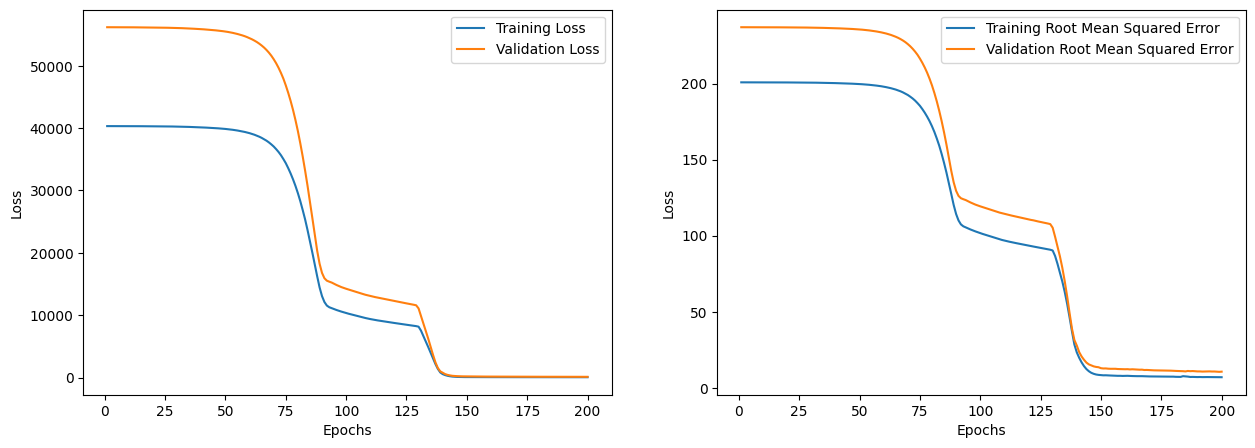

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [ ]:
MSFT_prediction = MSFT_Model.predict(MSFT_Unseen_Test_X)

1/1 [==============================] - 0s 474ms/step


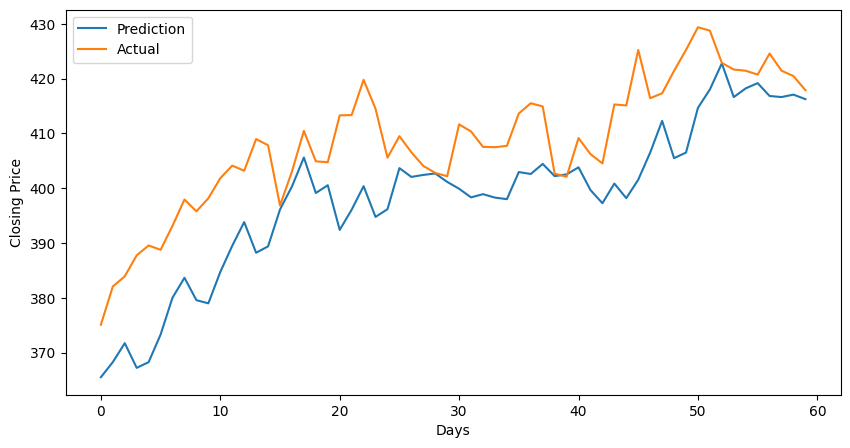

In [ ]:
#Plot the Results
plt.figure(figsize = (10, 5))
plt.plot(MSFT_prediction.reshape(-1), label = 'Prediction')
plt.plot(MSFT_Unseen_Test_Y.reshape(-1), label = 'Actual')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(MSFT_Unseen_Test_Y.reshape(-1, 5), MSFT_prediction))
mape = np.mean(np.abs(MSFT_prediction - MSFT_Unseen_Test_Y.reshape(-1, 5))/np.abs(MSFT_Unseen_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 12.21017735284271
MAPE: 0.025229064008361553


NETFLIX


In [ ]:
#Creating Train and Test Data

NFLX_Date = '2022-1-1'
NFLX_Train_X, NFLX_Train_Y, NFLX_Test_X, NFLX_Test_Y = Dataset(NFLX_Data, NFLX_Date)

In [ ]:
#Creating Unseen Data

NFLX_Unseen_Date = '2023-4-1'

NFLX_Unseen_Train_X, NFLX_Unseen_Train_Y, NFLX_Unseen_Test_X, NFLX_Unseen_Test_Y = Dataset(NFLX_Unseen, NFLX_Unseen_Date)

In [ ]:
#NFLX_Model

NFLX_Model = New_Model()

NFLX_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

NFLX_hist = NFLX_Model.fit(NFLX_Train_X, NFLX_Train_Y, epochs = 200, validation_data = (NFLX_Test_X, NFLX_Test_Y), callbacks=[callback])

Epoch 1/200
8/8 [==============================] - 6s 131ms/step - loss: 169624.1875 - root_mean_squared_error: 411.8546 - val_loss: 81327.4141 - val_root_mean_squared_error: 285.1796 - lr: 0.0000e+00
Epoch 2/200
8/8 [==============================] - 0s 48ms/step - loss: 169623.6875 - root_mean_squared_error: 411.8539 - val_loss: 81326.9688 - val_root_mean_squared_error: 285.1789 - lr: 6.6667e-08
Epoch 3/200
8/8 [==============================] - 0s 51ms/step - loss: 169621.9062 - root_mean_squared_error: 411.8518 - val_loss: 81326.0859 - val_root_mean_squared_error: 285.1773 - lr: 1.3333e-07
Epoch 4/200
8/8 [==============================] - 0s 49ms/step - loss: 169618.7188 - root_mean_squared_error: 411.8480 - val_loss: 81324.7656 - val_root_mean_squared_error: 285.1750 - lr: 2.0000e-07
Epoch 5/200
8/8 [==============================] - 0s 50ms/step - loss: 169613.9844 - root_mean_squared_error: 411.8422 - val_loss: 81323.0156 - val_root_mean_squared_error: 285.1719 - lr: 2.6667e-07

In [ ]:
history_dict = NFLX_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

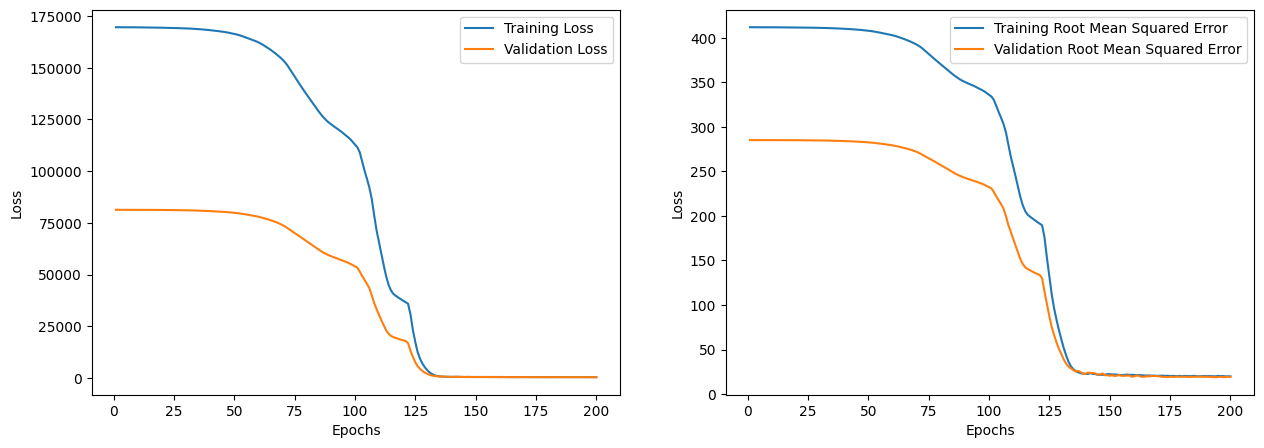

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [ ]:
NFLX_prediction = NFLX_Model.predict(NFLX_Unseen_Test_X)

1/1 [==============================] - 1s 881ms/step


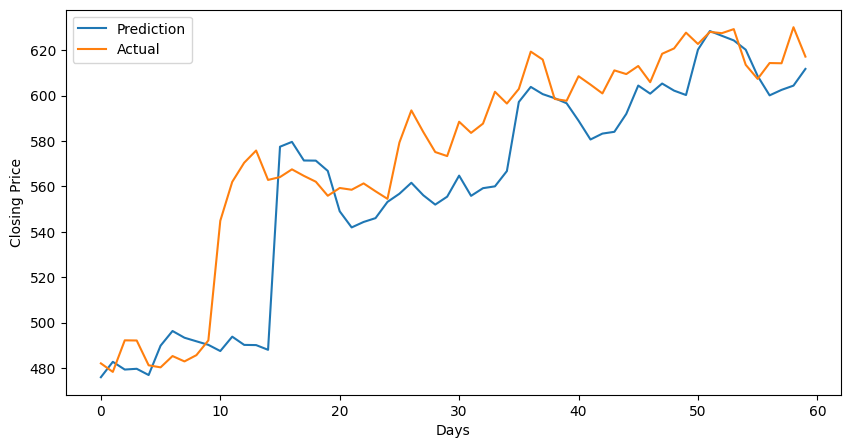

In [ ]:
#Plot the Results
plt.figure(figsize = (10, 5))
plt.plot(NFLX_prediction.reshape(-1), label = 'Prediction')
plt.plot(NFLX_Unseen_Test_Y.reshape(-1), label = 'Actual')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(NFLX_Unseen_Test_Y.reshape(-1, 5), NFLX_prediction))
mape = np.mean(np.abs(NFLX_prediction - NFLX_Unseen_Test_Y.reshape(-1, 5))/np.abs(NFLX_Unseen_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 26.663724421053768
MAPE: 0.032439144028332305


STARBUCKS

In [ ]:
#Creating Train and Test Data

SBUX_Date = '2022-1-1'
SBUX_Train_X, SBUX_Train_Y, SBUX_Test_X, SBUX_Test_Y = Dataset(SBUX_Data, SBUX_Date)

In [ ]:
#Creating Unseen Data

SBUX_Unseen_Date = '2023-4-1'

SBUX_Unseen_Train_X, SBUX_Unseen_Train_Y, SBUX_Unseen_Test_X, SBUX_Unseen_Test_Y = Dataset(SBUX_Unseen, SBUX_Unseen_Date)

In [ ]:
#SBUX_Model

SBUX_Model = New_Model()

SBUX_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

SBUX_hist = SBUX_Model.fit(SBUX_Train_X, SBUX_Train_Y, epochs = 200, validation_data = (SBUX_Test_X, SBUX_Test_Y), callbacks=[callback])

Epoch 1/200
8/8 [==============================] - 9s 146ms/step - loss: 6437.7319 - root_mean_squared_error: 80.2355 - val_loss: 8502.0566 - val_root_mean_squared_error: 92.2066 - lr: 0.0000e+00
Epoch 2/200
8/8 [==============================] - 0s 56ms/step - loss: 6437.7212 - root_mean_squared_error: 80.2354 - val_loss: 8502.0205 - val_root_mean_squared_error: 92.2064 - lr: 6.6667e-08
Epoch 3/200
8/8 [==============================] - 0s 56ms/step - loss: 6437.6860 - root_mean_squared_error: 80.2352 - val_loss: 8501.9463 - val_root_mean_squared_error: 92.2060 - lr: 1.3333e-07
Epoch 4/200
8/8 [==============================] - 0s 57ms/step - loss: 6437.6250 - root_mean_squared_error: 80.2348 - val_loss: 8501.8330 - val_root_mean_squared_error: 92.2054 - lr: 2.0000e-07
Epoch 5/200
8/8 [==============================] - 0s 55ms/step - loss: 6437.5356 - root_mean_squared_error: 80.2343 - val_loss: 8501.6875 - val_root_mean_squared_error: 92.2046 - lr: 2.6667e-07
Epoch 6/200
8/8 [=======

In [ ]:
history_dict = SBUX_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

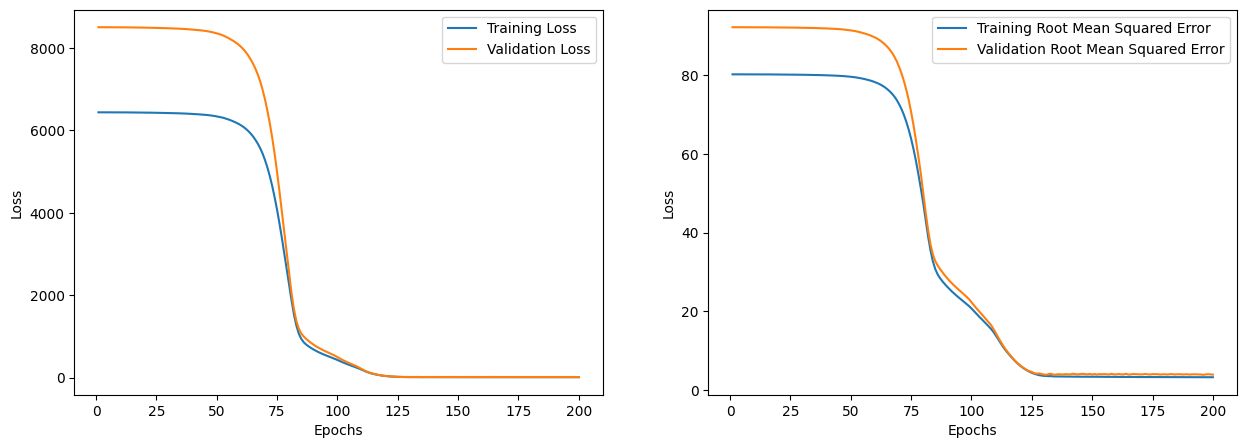

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [ ]:
SBUX_prediction = SBUX_Model.predict(SBUX_Unseen_Test_X)

1/1 [==============================] - 1s 519ms/step


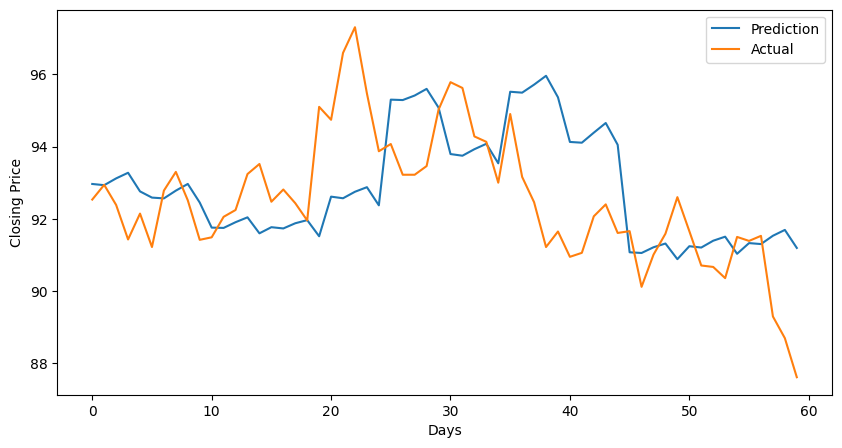

In [ ]:
#Plot the Results
plt.figure(figsize = (10, 5))
plt.plot(SBUX_prediction.reshape(-1), label = 'Prediction')
plt.plot(SBUX_Unseen_Test_Y.reshape(-1), label = 'Actual')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(SBUX_Unseen_Test_Y.reshape(-1, 5), SBUX_prediction))
mape = np.mean(np.abs(SBUX_prediction - SBUX_Unseen_Test_Y.reshape(-1, 5))/np.abs(SBUX_Unseen_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 1.9294537798650784
MAPE: 0.01589920645316951


In [ ]:
SBUX = pd.read_csv("/content/gdrive/My Drive/sbux.csv")
NFLX = pd.read_csv("/content/gdrive/My Drive/nflx.csv")

In [ ]:
def DatasetNew(Data, Date):

  Train_Data = Data['Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)

  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)

  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

#Starbucks

In [ ]:
SBUX.head()

,Date,Open,High,Low,Close,Volume,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,4/5/2024,$87.90,$87.93,$86.83,$86.85,7161442,NaN,NaN,NaN
1,4/4/2024,$89.13,$89.34,$87.61,$87.62,8057591,NaN,NaN,NaN
2,4/3/2024,$89.60,$89.84,$88.65,$88.70,6316375,NaN,NaN,NaN
3,4/2/2024,$91.11,$91.24,$89.23,$89.30,8276754,NaN,NaN,NaN
4,4/1/2024,$91.82,$92.07,$91.02,$91.53,4990156,NaN,NaN,NaN


In [ ]:
SBUX["Open"] = SBUX["Open"].str[1:]
SBUX["Open"] = SBUX["Open"].astype(float)

SBUX["High"] = SBUX["High"].str[1:]
SBUX["High"] = SBUX["High"].astype(float)

SBUX["Low"] = SBUX["Low"].str[1:]
SBUX["Low"] = SBUX["Low"].astype(float)

SBUX["Close"] = SBUX["Close"].str[1:]
SBUX["Close"] = SBUX["Close"].astype(float)

In [ ]:
SBUX = SBUX[["Date", "Open", "High", "Low", "Close", "Volume"]]

In [ ]:
SBUX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [ ]:
# Change Dtype of Date column
SBUX["Date"] = pd.to_datetime(SBUX["Date"])
SBUX

,Date,Open,High,Low,Close,Volume
0,2024-04-05,87.90,87.93,86.83,86.85,7161442
1,2024-04-04,89.13,89.34,87.61,87.62,8057591
2,2024-04-03,89.60,89.84,88.65,88.70,6316375
3,2024-04-02,91.11,91.24,89.23,89.30,8276754
4,2024-04-01,91.82,92.07,91.02,91.53,4990156
...,...,...,...,...,...,...
1253,2019-04-12,76.10,76.95,76.07,76.65,5193888
1254,2019-04-11,75.75,76.07,75.65,75.87,6042545
1255,2019-04-10,75.21,75.82,75.21,75.48,5889004
1256,2019-04-09,74.87,75.23,74.80,75.12,4904315


###Split the Data into Training and Test set
    Training Period: 2015-01-02 - 2020-09-30

    Testing Period:  2020-10-01 - 2021-02-26

In [ ]:
SBUX_Date = '2023-12-01'
SBUX_Train_X, SBUX_Train_Y, SBUX_Test_X, SBUX_Test_Y = DatasetNew(SBUX, SBUX_Date)

### Model Fitting

In [ ]:
SBUX_Model = Model()

In [ ]:
SBUX_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [ ]:
SBUX_hist = SBUX_Model.fit(SBUX_Train_X, SBUX_Train_Y, epochs = 200, validation_data = (SBUX_Test_X, SBUX_Test_Y), callbacks=[callback])

Epoch 1/200
8/8 [==============================] - 4s 124ms/step - loss: 8882.8906 - root_mean_squared_error: 94.2491 - val_loss: 8642.0459 - val_root_mean_squared_error: 92.9626 - lr: 0.0000e+00
Epoch 2/200
8/8 [==============================] - 0s 55ms/step - loss: 8882.8242 - root_mean_squared_error: 94.2487 - val_loss: 8641.8809 - val_root_mean_squared_error: 92.9617 - lr: 6.6667e-08
Epoch 3/200
8/8 [==============================] - 0s 59ms/step - loss: 8882.5830 - root_mean_squared_error: 94.2475 - val_loss: 8641.5518 - val_root_mean_squared_error: 92.9599 - lr: 1.3333e-07
Epoch 4/200
8/8 [==============================] - 0s 54ms/step - loss: 8882.1709 - root_mean_squared_error: 94.2453 - val_loss: 8641.0566 - val_root_mean_squared_error: 92.9573 - lr: 2.0000e-07
Epoch 5/200
8/8 [==============================] - 0s 55ms/step - loss: 8881.5791 - root_mean_squared_error: 94.2421 - val_loss: 8640.3965 - val_root_mean_squared_error: 92.9537 - lr: 2.6667e-07
Epoch 6/200
8/8 [=======

In [ ]:
history_dict = SBUX_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

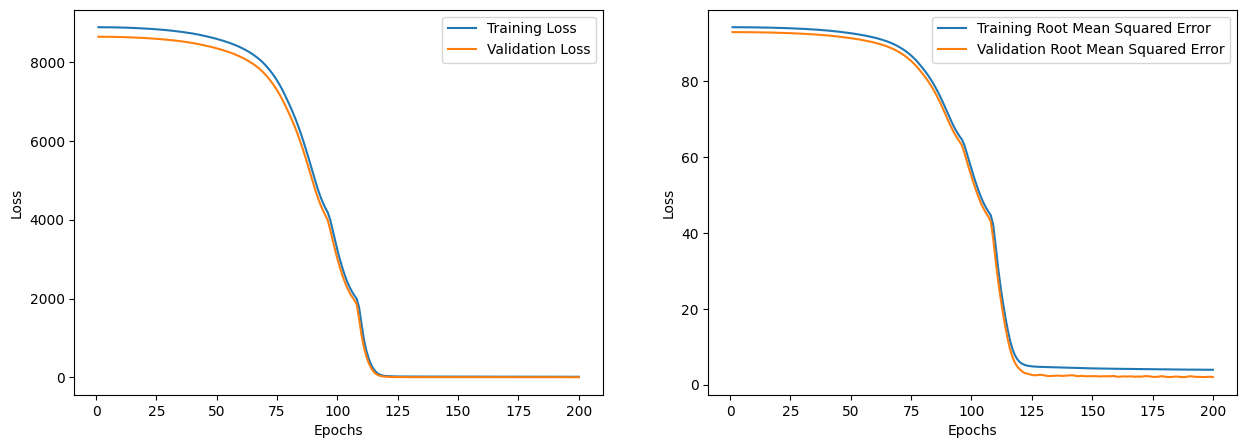

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Starbucks

In [ ]:
SBUX_prediction = SBUX_Model.predict(SBUX_Test_X)

1/1 [==============================] - 0s 25ms/step


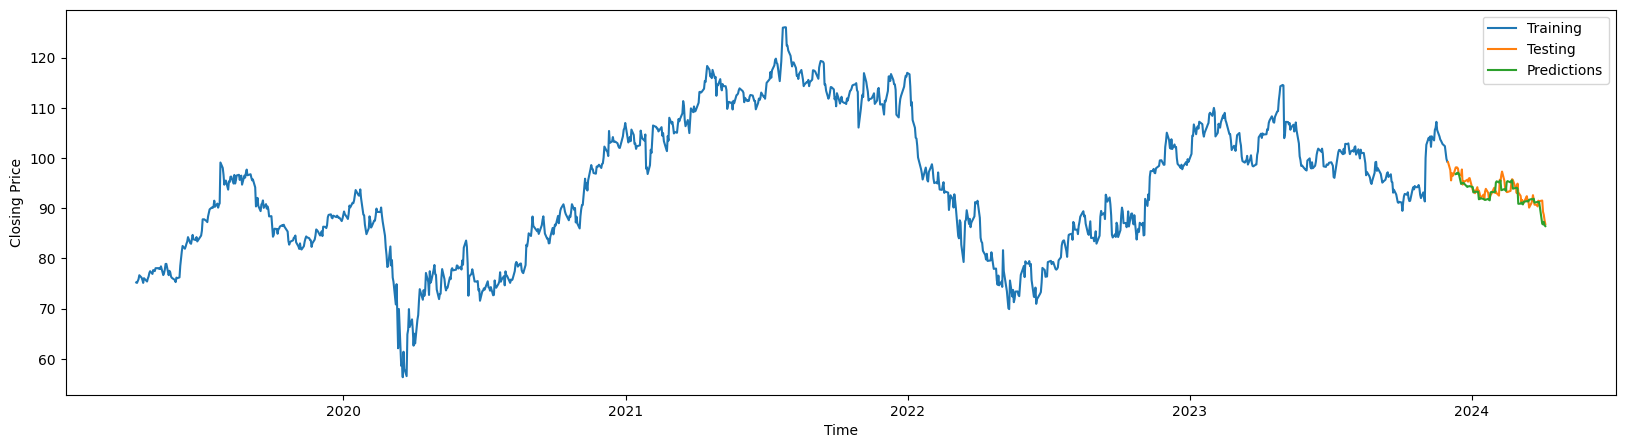

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(SBUX['Date'][SBUX['Date'] < '2023-12-01'], SBUX['Close'][SBUX['Date'] < '2023-12-01'], label = 'Training')
plt.plot(SBUX['Date'][SBUX['Date'] >= '2023-12-01'], SBUX['Close'][SBUX['Date'] >= '2023-12-01'], label = 'Testing')
plt.plot(SBUX['Date'][SBUX['Date'] >= '2023-12-09'], SBUX_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [ ]:
rmse = math.sqrt(mean_squared_error(SBUX_Test_Y.reshape(-1, 5), SBUX_prediction))
mape = np.mean(np.abs(SBUX_prediction - SBUX_Test_Y.reshape(-1, 5))/np.abs(SBUX_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 2.0052444424938196
MAPE: 0.01681388468626473


#Netflix

In [ ]:
NFLX.head()

,Date,Open,High,Low,Close,Volume
0,2024-04-05,7.90,637.91,622.71,636.18,3378842
1,2024-04-04,9.13,638.00,616.58,617.14,3064349
2,2024-04-03,9.60,630.41,611.50,630.08,2931231
3,2024-04-02,1.11,615.03,605.51,614.21,2029217
4,2024-04-01,1.82,615.11,605.57,614.31,2115925


In [ ]:
NFLX["Open"] = NFLX["Open"].str[1:]
NFLX["Open"] = NFLX["Open"].astype(float)

NFLX["High"] = NFLX["High"].str[1:]
NFLX["High"] = NFLX["High"].astype(float)

NFLX["Low"] = NFLX["Low"].str[1:]
NFLX["Low"] = NFLX["Low"].astype(float)

NFLX["Close"] = NFLX["Close"].str[1:]
NFLX["Close"] = NFLX["Close"].astype(float)

In [ ]:
NFLX = NFLX[["Date", "Open", "High", "Low", "Close", "Volume"]]

In [ ]:
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [ ]:
# Change Dtype of Date column
NFLX["Date"] = pd.to_datetime(NFLX["Date"])
NFLX

,Date,Open,High,Low,Close,Volume
0,2024-04-05,624.92,637.91,622.71,636.18,3378842
1,2024-04-04,633.21,638.00,616.58,617.14,3064349
2,2024-04-03,612.75,630.41,611.50,630.08,2931231
3,2024-04-02,611.00,615.03,605.51,614.21,2029217
4,2024-04-01,608.00,615.11,605.57,614.31,2115925
...,...,...,...,...,...,...
1253,2019-04-12,360.69,361.75,349.36,351.14,15605580
1254,2019-04-11,365.00,370.12,360.81,367.65,6416155
1255,2019-04-10,365.79,368.85,362.25,363.92,4537963
1256,2019-04-09,360.54,366.74,359.00,364.71,5431467


###Split the Data into Training and Test set
    Training Period: 2019-04-08 - 2023-12-01

    Testing Period:  2023-12-01 - 2024-04-05

In [ ]:
NFLX_Date = '2023-12-01'
NFLX_Train_X, NFLX_Train_Y, NFLX_Test_X, NFLX_Test_Y = DatasetNew(NFLX, NFLX_Date)

### Model Fitting

In [ ]:
NFLX_Model = Model()

In [ ]:
NFLX_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [ ]:
NFLX_hist = NFLX_Model.fit(NFLX_Train_X, NFLX_Train_Y, epochs = 200, validation_data = (NFLX_Test_X, NFLX_Test_Y), callbacks=[callback])

Epoch 1/200
8/8 [==============================] - 4s 93ms/step - loss: 175239.6562 - root_mean_squared_error: 418.6164 - val_loss: 295210.8438 - val_root_mean_squared_error: 543.3331 - lr: 0.0000e+00
Epoch 2/200
8/8 [==============================] - 0s 33ms/step - loss: 175237.3125 - root_mean_squared_error: 418.6136 - val_loss: 295195.7812 - val_root_mean_squared_error: 543.3192 - lr: 6.6667e-08
Epoch 3/200
8/8 [==============================] - 0s 35ms/step - loss: 175229.0156 - root_mean_squared_error: 418.6037 - val_loss: 295166.1250 - val_root_mean_squared_error: 543.2919 - lr: 1.3333e-07
Epoch 4/200
8/8 [==============================] - 0s 48ms/step - loss: 175214.5625 - root_mean_squared_error: 418.5864 - val_loss: 295124.9375 - val_root_mean_squared_error: 543.2540 - lr: 2.0000e-07
Epoch 5/200
8/8 [==============================] - 0s 55ms/step - loss: 175194.4219 - root_mean_squared_error: 418.5623 - val_loss: 295077.4062 - val_root_mean_squared_error: 543.2103 - lr: 2.6667

In [ ]:
history_dict = NFLX_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

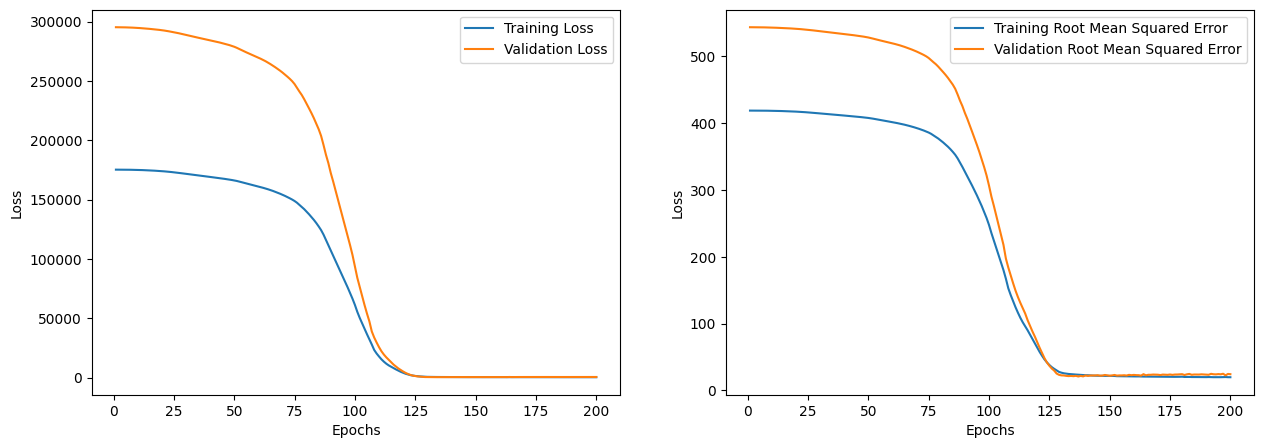

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Netflix

In [ ]:
NFLX_prediction = NFLX_Model.predict(NFLX_Test_X)

1/1 [==============================] - 0s 26ms/step


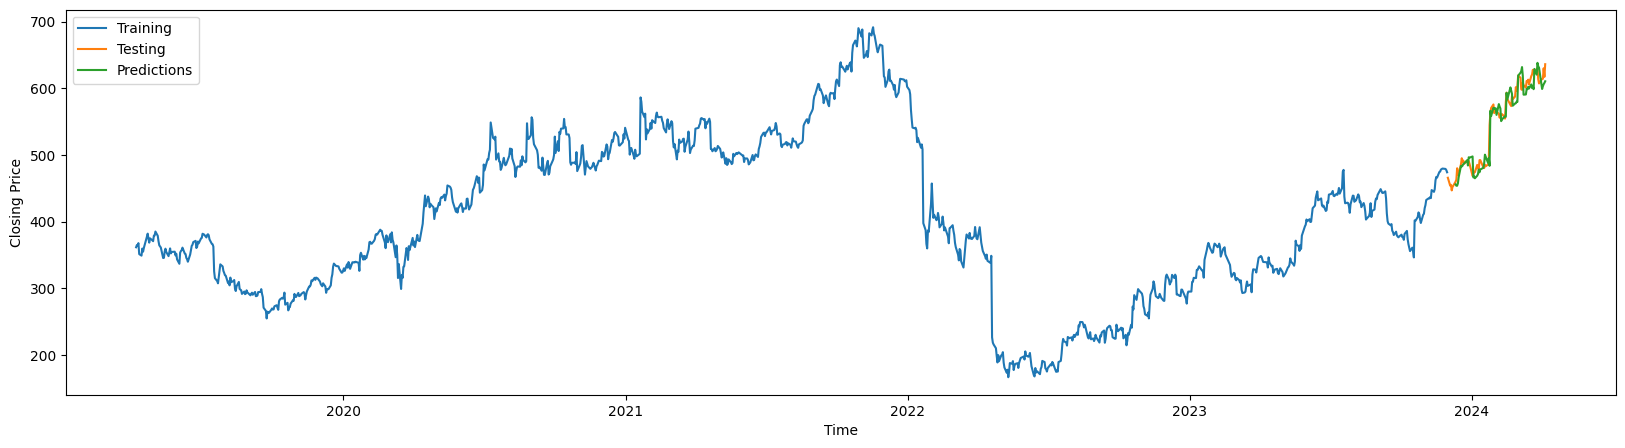

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(NFLX['Date'][NFLX['Date'] < '2023-12-01'], NFLX['Close'][NFLX['Date'] < '2023-12-01'], label = 'Training')
plt.plot(NFLX['Date'][NFLX['Date'] >= '2023-12-01'], NFLX['Close'][NFLX['Date'] >= '2023-12-01'], label = 'Testing')
plt.plot(NFLX['Date'][NFLX['Date'] >= '2023-12-09'], NFLX_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [ ]:
rmse = math.sqrt(mean_squared_error(NFLX_Test_Y.reshape(-1, 5), NFLX_prediction))
mape = np.mean(np.abs(NFLX_prediction - NFLX_Test_Y.reshape(-1, 5))/np.abs(NFLX_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 24.332638303573066
MAPE: 0.030925758052962417
